In [437]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.datasets import make_classification

import sklearn
from sklearn.model_selection import train_test_split #train test package
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [438]:
df=pd.read_csv("C:/Users/jpadmanabhan/Downloads/train.csv")
df2=pd.read_csv("C:/Users/jpadmanabhan/Downloads/test.csv")
df3=pd.read_csv("C:/Users/jpadmanabhan/Downloads/test.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [439]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [440]:
df3.drop(["Fare","Name", "Ticket","Sex","Age","Cabin","Embarked"],axis = 1, inplace=True)
df3

,PassengerId,Pclass,SibSp,Parch
0,892,3,0,0
1,893,3,1,0
2,894,2,0,0
3,895,3,0,0
4,896,3,1,1
...,...,...,...,...
413,1305,3,0,0
414,1306,1,0,0
415,1307,3,0,0
416,1308,3,0,0


### DATA PREPROCESSING

In [4]:
index=['S','C','Q']
# graph_EmS = pd.DataFrame({'Embarked': df['Embarked'],
#                    'Survived': df['Survived']})
ax = [df.Embarked.value_counts(),df['Survived']].plot(kind='bar', title ="Analyze", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Embarked", fontsize=12)
ax.set_ylabel("Survived", fontsize=12)
plt.show()


# creating dataframe
df3 = pd.DataFrame({
    'Name': ['John', 'Sammy', 'Joe'],
    'Age': [45, 38, 90],
    'Height(in cm)': [150, 180, 160]
})
  
# plotting graph
df3.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar")

AttributeError: 'list' object has no attribute 'plot'

In [57]:
count = len(df.index)
count

891

<AxesSubplot:xlabel='Survived', ylabel='Count'>

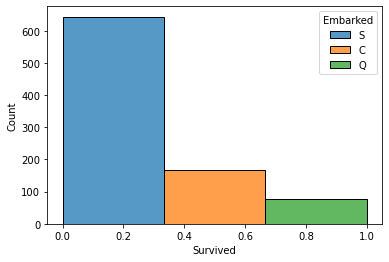

In [65]:
sns.histplot(binwidth=1,
            x=df.Survived,
            hue=df.Embarked,
            data=df,
            stat="count",
            multiple="dodge")

<AxesSubplot:xlabel='Survived', ylabel='Count'>

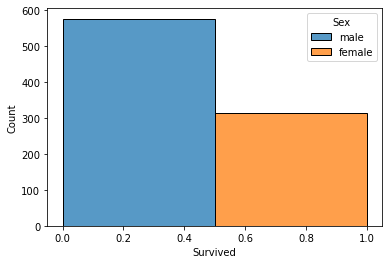

In [74]:
sns.histplot(binwidth=1,
            x=df.Survived,
            hue=df.Sex,
            data=df,
            stat="count",
            multiple="dodge")

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

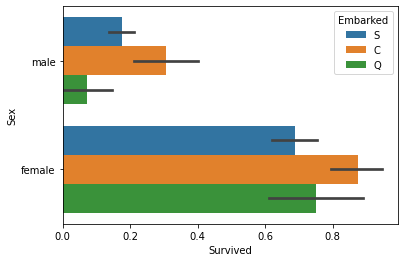

In [73]:
sns.barplot(x ='Survived', y ='Sex', data = df, hue ='Embarked')

In [441]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [442]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [443]:
df2['Fare'].fillna(df2['Fare'].median(), inplace = True)

In [444]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df2['Age'].fillna(df2['Age'].median(), inplace = True)

In [445]:
df['Cabin'] = df['Cabin'].str[:1]
df2['Cabin'] = df2['Cabin'].str[:1]
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


In [446]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace = True)
df2['Cabin'].fillna(df2['Cabin'].mode()[0], inplace = True)

In [447]:
df.drop(["Fare", "Name", "Ticket", "PassengerId","Cabin"],axis = 1, inplace=True)
df2.drop(["Fare","Name", "Ticket", "PassengerId","Cabin"],axis = 1, inplace=True)

In [449]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [29]:
#df2['Fare'] = df2['Fare'].fillna(df2['Fare'].mean())

In [30]:
#df['Age'] = df['Age'].fillna(df['Age'].median())

In [31]:
#df2['Age'] = df2['Age'].fillna(df2['Age'].median())

In [436]:
# df['Cabin'] = pd.to_numeric(df['Cabin'].str.extract('(\d+)')[0],errors='coerce') #remove letter from string number combined
# df2['Cabin'] = pd.to_numeric(df2['Cabin'].str.extract('(\d+)')[0],errors='coerce')

# df['Cabin'] = df['Cabin'].fillna(0)
# df2['Cabin'] = df2['Cabin'].fillna(0)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,1,1,0,2,2
1,1,1,0,1,1,0,2,0
2,1,3,0,1,0,0,2,2
3,1,1,0,1,1,0,2,2
4,0,3,1,1,0,0,2,2
...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,2,2
887,1,1,0,1,0,0,1,2
888,0,3,0,1,1,2,2,2
889,1,1,1,1,0,0,2,0


In [288]:
#df.dropna(inplace=True)

In [289]:
df.Cabin.unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [450]:
lb = LabelEncoder()
df['Sex'] = lb.fit_transform(df['Sex']) #LABEL ENCODING
#df['Cabin'] = lb.fit_transform(df['Cabin']) #LABEL ENCODING
df['Embarked'] = lb.fit_transform(df['Embarked']) #LABEL ENCODING

#df2['Cabin'] = lb.fit_transform(df2['Cabin']) #LABEL ENCODING
df2['Embarked'] = lb.fit_transform(df2['Embarked']) #LABEL ENCODING
df2['Sex'] = lb.fit_transform(df2['Sex']) #LABEL ENCODING

In [345]:
#dfE = pd.get_dummies(df['Embarked'])

#df = pd.get_dummies(df, columns = ['Embarked'])
#df2 = pd.get_dummies(df2, columns = ['Embarked'])

#df = pd.get_dummies(df, columns = ['Cabin'])
#df2 = pd.get_dummies(df2, columns = ['Cabin'])

#df = df.assign(pd.get_dummies(df['Embarked']))
#df.drop([df['Embarked']], axis=1, inplace=True)

#df = df.replace(to_replace = ['S','Q','C'],value = ['0','1','2'])
#df2 = df2.replace(to_replace = ['S','Q','C'],value = ['0','1','2'])

In [452]:
df['Age'] = df['Age'].astype(int)
df['Embarked'] = df['Embarked'].astype(int)
#df['Cabin'] = df['Cabin'].astype(int)
df['Sex'] = df['Sex'].astype(int)
# df['Embarked_C'] = df['Embarked_C'].astype(int)
# df['Embarked_Q'] = df['Embarked_Q'].astype(int)
# df['Embarked_S'] = df['Embarked_S'].astype(int)

df2['Age'] = df2['Age'].astype(int)
df2['Embarked'] = df2['Embarked'].astype(int)
#df['Cabin'] = df['Cabin'].astype(int)
df2['Sex'] = df2['Sex'].astype(int)
# df2['Embarked_C'] = df2['Embarked_C'].astype(int)
# df2['Embarked_Q'] = df2['Embarked_Q'].astype(int)
# df2['Embarked_S'] = df2['Embarked_S'].astype(int)

In [454]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int32
Age         int32
SibSp       int64
Parch       int64
Embarked    int32
dtype: object

In [455]:
df['Age'].count()

891

In [456]:
# TO INSERT NEW COLUMN
#Age1 = df['Age']
# df.insert(2, "Age1", Age1, True)
# df['Age1']

In [457]:
for i in range(0, df['Age'].count()):
    if df['Age'][i] >= 18:
        df['Age'][i] = 1 
        #print(df['Age'][i])
    else:
        df['Age'][i] = 0

C:\Users\jpadmanabhan\AppData\Local\Temp\ipykernel_16064\2543435176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = 1
C:\Users\jpadmanabhan\AppData\Local\Temp\ipykernel_16064\2543435176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = 0


In [458]:
for i in range(0, df2['Age'].count()):
    if df2['Age'][i] >= 18:
        df2['Age'][i] = 1 
        #print(df['Age'][i])
    else:
        df2['Age'][i] = 0

C:\Users\jpadmanabhan\AppData\Local\Temp\ipykernel_16064\273937151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'][i] = 1
C:\Users\jpadmanabhan\AppData\Local\Temp\ipykernel_16064\273937151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'][i] = 0


In [459]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,1,1,0,2
1,1,1,0,1,1,0,0
2,1,3,0,1,0,0,2
3,1,1,0,1,1,0,2
4,0,3,1,1,0,0,2
...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,2
887,1,1,0,1,0,0,2
888,0,3,0,1,1,2,2
889,1,1,1,1,0,0,0


In [460]:
df2

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,1,0,0,1
1,3,0,1,1,0,2
2,2,1,1,0,0,1
3,3,1,1,0,0,2
4,3,0,1,1,1,2
...,...,...,...,...,...,...
413,3,1,1,0,0,2
414,1,0,1,0,0,0
415,3,1,1,0,0,2
416,3,1,1,0,0,2


### TRAINING MODEL 

In [461]:
x = df.drop('Survived', axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,1,1,0,2
1,1,0,1,1,0,0
2,3,0,1,0,0,2
3,1,0,1,1,0,2
4,3,1,1,0,0,2


In [462]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [601]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

#x_train1, y_train1 = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=2)
#x_test1, y_test1 = make_classification(n_samples=1000,n_features=20, n_informative=15, random_state=2)

In [602]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [603]:
modelLR = LogisticRegression(max_iter=3000)
modelLR.fit(x_train, y_train)

LogisticRegression(max_iter=3000)

In [604]:
y_predictLR = modelLR.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictLR)
accuracy
#0.8212290502793296

0.8100558659217877

In [605]:
cmLR = confusion_matrix(y_test, y_predictLR)
cmLR

array([[93, 12],
       [22, 52]], dtype=int64)

<Figure size 720x504 with 0 Axes>

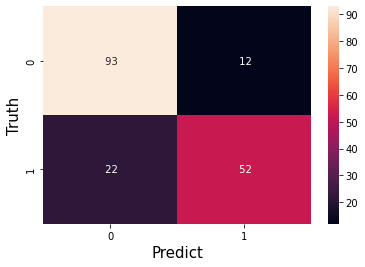

<Figure size 720x504 with 0 Axes>

In [606]:
sns.heatmap(cmLR, annot=True, fmt='3.0f')
plt.xlabel('Predict', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.figure(figsize=(10, 7))

The cross validated score for Logistic Regression is: 78.56


Text(0.5, 1.05, 'Confusion_matrix')

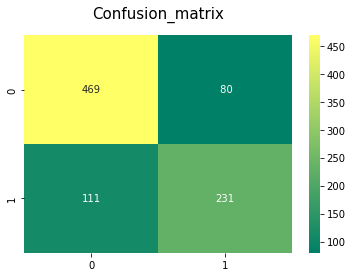

In [607]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(modelLR,x,y,cv=10,scoring='accuracy')
print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))
y_predLR = cross_val_predict(modelLR, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predLR),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [608]:
y_predictLR1 = modelLR.predict(df2)
y_predictLR1

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [609]:
#modelRFC = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=10)
modelRFC = RandomForestClassifier(n_estimators=9, max_depth=3, random_state=5)
modelRFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=9, random_state=5)

In [610]:
y_predictRFC = modelRFC.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictRFC)
accuracy
#0.8258426966292135

0.7932960893854749

In [611]:
cmRFC = confusion_matrix(y_test, y_predictRFC)
cmRFC

array([[95, 10],
       [27, 47]], dtype=int64)

The cross validated score for RFC is: 80.14


Text(0.5, 1.05, 'Confusion_matrix')

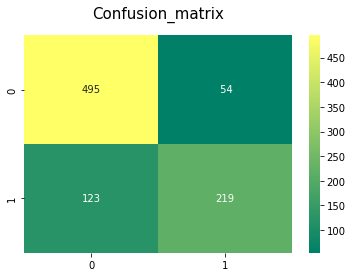

In [612]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_rfc=cross_val_score(modelRFC,x,y,cv=10,scoring='accuracy')
print('The cross validated score for RFC is:',round(result_rfc.mean()*100,2))
y_predRFC = cross_val_predict(modelRFC, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predRFC),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [613]:
y_predictRFC1 = modelRFC.predict(df2)
y_predictRFC1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [614]:
modelXGB = xgb.XGBClassifier(learning_rate=0.05, max_depth=8, random_state=2, n_estimators=9, colsample_bytree=0.5) 
modelXGB.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=9, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=2, ...)

In [615]:
y_predictXGB = modelXGB.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictXGB)
accuracy
#0.8286516853932584

0.7877094972067039

In [616]:
y_predictXGB1 = modelXGB.predict(df2)
y_predictXGB1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [617]:
cmXGB = confusion_matrix(y_test, y_predictXGB)
cmXGB

array([[99,  6],
       [32, 42]], dtype=int64)

The cross validated score for XGB is: 79.36


Text(0.5, 1.05, 'Confusion_matrix')

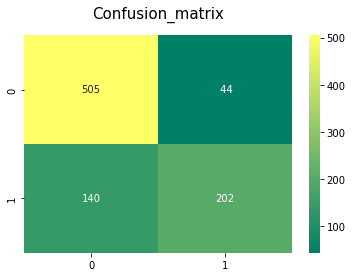

In [618]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_xgb=cross_val_score(modelXGB,x,y,cv=10,scoring='accuracy')
print('The cross validated score for XGB is:',round(result_xgb.mean()*100,2))
y_predXGB = cross_val_predict(modelXGB, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predXGB),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [619]:
y_predictXGB1 = modelXGB.predict(df2)
y_predictXGB1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [597]:
modelKNN = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
modelKNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

In [598]:
y_predictKNN = modelKNN.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictKNN)
accuracy

0.7932960893854749

In [599]:
cmKNN = confusion_matrix(y_test, y_predictKNN)
cmKNN

array([[98, 14],
       [23, 44]], dtype=int64)

The cross validated score for KNN is: 76.31


Text(0.5, 1.05, 'Confusion_matrix')

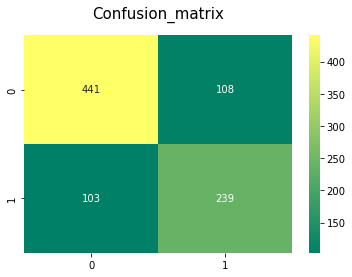

In [600]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(modelKNN,x,y,cv=10,scoring='accuracy')
print('The cross validated score for KNN is:',round(result_knn.mean()*100,2))
y_predKNN = cross_val_predict(modelKNN, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predKNN),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [486]:
#submission1 = pd.read_csv('C:/Users/jpadmanabhan/Downloads/gender_submission.csv')
#submission1['Survived'] = y_predictXGB1
#submission1.to_csv('submission1.csv', index=False)

In [623]:
features = ["Sex","Pclass","SibSp","Parch", "Age", "Embarked"]
train_x = pd.get_dummies(x_train[features])
test_x= pd.get_dummies(df2[features])

In [624]:
modelRFC.fit(train_x, y_train)

RandomForestClassifier(max_depth=3, n_estimators=9, random_state=5)

In [626]:
ypredRFC3 = modelRFC.predict(test_x)
score = cross_val_score(modelRFC, test_x, ypredRFC3)
print('Cross validation score',score)
ypredRFC3 = ypredRFC3.astype(int)

Cross validation score [0.95238095 0.92857143 0.95238095 1.         0.97590361]


In [629]:
final_output = pd.DataFrame({'PassengerId': df3.PassengerId, 'Survived': ypredRFC3})
final_output.to_csv('submission15.csv', index=False)

In [327]:
cm = confusion_matrix(y_test, y_predictRFC)
cm

array([[105,   7],
       [ 28,  39]], dtype=int64)

<Figure size 720x504 with 0 Axes>

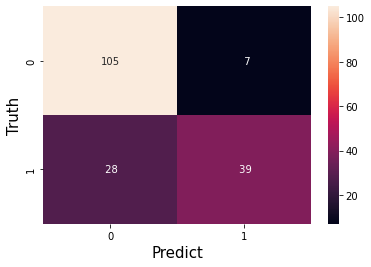

<Figure size 720x504 with 0 Axes>

In [328]:
sns.heatmap(cm, annot=True,fmt='3.0f')
plt.xlabel('Predict', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.figure(figsize=(10, 7))